In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [9]:
df=pd.read_csv("canada_per_capita_income.csv")
df=df.rename(columns={'per capita income (US$)':'income'})
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


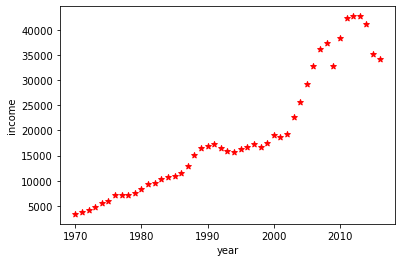

In [10]:
plt.xlabel("year")
plt.ylabel("income")
plt.scatter(df.year,df.income, color="red", marker='*')

In [18]:
rg=linear_model.LinearRegression()
year=np.asanyarray(df[['year']])
inco=np.asanyarray(df[['income']])

In [19]:
rg.fit(year,inco)

LinearRegression()

In [22]:
inco_pred=rg.predict(year)
inco_pred[0]

array([-134.55966672])

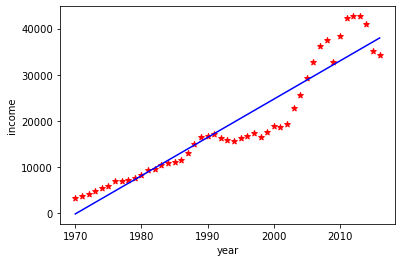

In [23]:
plt.xlabel("year")
plt.ylabel("income")
plt.scatter(df.year,df.income, color="red", marker='*')
plt.plot(year,inco_pred, color="blue")

In [31]:
MSE=mean_squared_error(inco,inco_pred)
r2=r2_score(inco,inco_pred)
print("MSE= %.2f \nR2= %.2f" % (MSE, r2))

MSE= 15462739.06 
R2= 0.89


In [37]:
pred_2022=rg.predict([[2022]])
print("the annual income in 2022= %.2f" % pred_2022)

the annual income in 2022= 42945.62


In [42]:
pred_multiple=rg.predict([[2020],[2021],[2022],[2023]])
pred_multiple

array([[41288.69409442],
       [42117.15916964],
       [42945.62424486],
       [43774.08932009]])

In [86]:
df11=pd.DataFrame([[2020],[2021],[2022],[2023]],columns=['year'])
df22=df11
df11

,year
0,2020
1,2021
2,2022
3,2023


In [74]:
df11['future_pred']=pred_multiple
df11

,year,future_pred
0,2020,41288.694094
1,2021,42117.159170
2,2022,42945.624245
3,2023,43774.089320


In [75]:
df11.to_csv("future income pred.csv")

In [87]:
df22.insert(0,'haha',pred_multiple) #insert a column in a specified position
df22

,haha,year
0,41288.694094,2020
1,42117.159170,2021
2,42945.624245,2022
3,43774.089320,2023


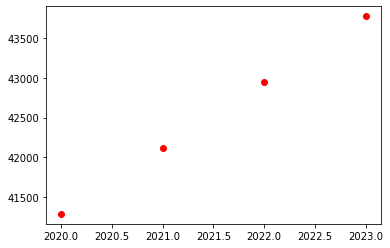

In [97]:
plt.xlabel=('year')
plt.ylabel=('income')
plt.scatter(df11.year,pred_multiple, color='red')